In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from io import BytesIO
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("D:/APASD/datasets/train3/", 
                                          target_size=(150,150), 
                                          class_mode = 'binary')
                                          
                                          
                                         
test_dataset = test.flow_from_directory("D:/APASD/datasets/test3/",
                                          target_size=(150,150),
                                          class_mode = 'binary')

Found 866 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'human': 0, 'sign': 1}

In [4]:
test_dataset

In [5]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Convolutional layer and maxpool layer 3
# model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
# model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
#model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
#steps_per_epoch = train_imagesize/batch_size

# model.fit_generator(train_dataset,
#          steps_per_epoch = 25,
#          epochs = 4,
#          validation_data = test_dataset
    
#          )
model.fit(train_dataset,epochs = 4,batch_size=32,validation_data = test_dataset)

Epoch 1/4
 6/28 [=====>........................] - ETA: 57s - loss: 1.5509 - accuracy: 0.5052 

D:\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


28/28 [==============================] - 94s 3s/step - loss: 0.5715 - accuracy: 0.7806 - val_loss: 0.0658 - val_accuracy: 0.9738
Epoch 2/4
28/28 [==============================] - 54s 2s/step - loss: 0.0265 - accuracy: 0.9896 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 3/4
28/28 [==============================] - 51s 2s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9948
Epoch 4/4
28/28 [==============================] - 52s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000


In [8]:
#Save this model
model.save("D:/APASD/predimg.h5")

In [9]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val >0.5:
        plt.xlabel("Signature",fontsize=30)    
    else:
        plt.xlabel("Photograph",fontsize=30)

1/1 [==============================] - 3s 3s/step
[[0.]]


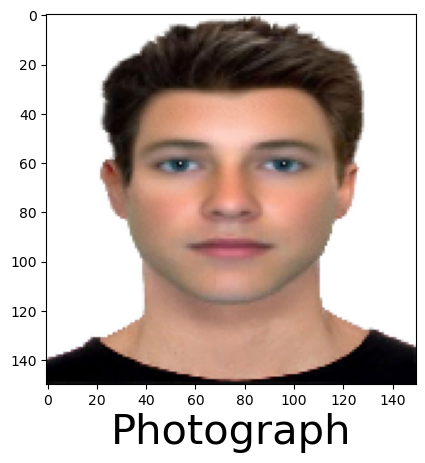

In [10]:
predictImage(r"D:\APASD\datasets\test3\human\h (12).jpg")